In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def map_image(image, label):
  '''Normalizes the image. Returns image as input and label.'''
  image = tf.cast(image, dtype=tf.float32)
  image = image / 255.0

  return image, image

In [ ]:
BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1024

train_dataset = tfds.load('fashion_mnist', as_supervised=True, split="train")
train_dataset = train_dataset.map(map_image)
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_dataset = tfds.load('fashion_mnist', as_supervised=True, split="test")
test_dataset = test_dataset.map(map_image)
test_dataset = test_dataset.batch(BATCH_SIZE).repeat()

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incompleteTOPT9M/fashion_mnist-train.tfrecord*...:   0%|  …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incompleteTOPT9M/fashion_mnist-test.tfrecord*...:   0%|   …

Dataset fashion_mnist downloaded and prepared to ~/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
def encoder(inputs):
  """Defines the encoder with two Conv2D and max pooling layers"""
  conv_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
                                  activation="relu", padding="same")(inputs)
  max_pool_1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv_1)

  conv_2 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3),
                                  activation="relu", padding="same")(max_pool_1)
  max_pool_2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv_2)

  return max_pool_2

In [ ]:
def bottle_neck(inputs):
  """Defines the bottleneck"""
  bottle_neck = tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3),
                                  activation="relu", padding="same")(inputs)
  encoder_visualization = tf.keras.layers.Conv2D(filters=1, kernel_size=(3, 3),
                                                activation="sigmoid", padding="same")(bottle_neck)
  return bottle_neck, encoder_visualization   

In [ ]:
def decoder(inputs):
  """Defines the decoder path to upsample back to original image size."""
  conv_1 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3),
                                  activation="relu", padding="same")(inputs)
  up_sample_1 = tf.keras.layers.UpSampling2D(size=(2, 2))(conv_1)

  conv_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
                                  activation="relu", padding="same")(up_sample_1)
  up_sample_1 = tf.keras.layers.UpSampling2D(size=(2, 2))(conv_2)

  conv_3 = tf.keras.layers.Conv2D(filters=1, kernel_size=(3, 3),
                                  activation="sigmoid", padding="same")(up_sample_1)
  return conv_3  

In [ ]:
def convolutional_auto_encoder():
  """Builds the entire autoencoder model."""
  inputs = tf.keras.layers.Input(shape=(28, 28, 1))
  encoder_output = encoder(inputs)
  bottleneck_output, encoder_visualization = bottle_neck(encoder_output)
  decoder_output = decoder(bottleneck_output)

  encoder_model = tf.keras.Model(inputs=inputs, outputs=encoder_visualization)
  model = tf.keras.Model(inputs=inputs, outputs=decoder_output)

  return model, encoder_model

In [ ]:
convolutional_model, convolutional_encoder_model = convolutional_auto_encoder()
convolutional_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 256)         2951

In [ ]:
train_steps = 60000 // BATCH_SIZE
valid_steps = 60000 // BATCH_SIZE

convolutional_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')
conv_model_history = convolutional_model.fit(train_dataset, steps_per_epoch=train_steps, validation_data=test_dataset, validation_steps=valid_steps, epochs=40)

Epoch 1/40
468/468 [==============================] - 25s 33ms/step - loss: 0.2910 - val_loss: 0.2660
Epoch 2/40
468/468 [==============================] - 13s 27ms/step - loss: 0.2600 - val_loss: 0.2588
Epoch 3/40
468/468 [==============================] - 12s 26ms/step - loss: 0.2549 - val_loss: 0.2553
Epoch 4/40
468/468 [==============================] - 12s 26ms/step - loss: 0.2525 - val_loss: 0.2545
Epoch 5/40
468/468 [==============================] - 12s 26ms/step - loss: 0.2513 - val_loss: 0.2528
Epoch 6/40
468/468 [==============================] - 12s 26ms/step - loss: 0.2503 - val_loss: 0.2521
Epoch 7/40
468/468 [==============================] - 13s 28ms/step - loss: 0.2498 - val_loss: 0.2513
Epoch 8/40
468/468 [==============================] - 13s 27ms/step - loss: 0.2490 - val_loss: 0.2508
Epoch 9/40
468/468 [==============================] - 12s 26ms/step - loss: 0.2487 - val_loss: 0.2502
Epoch 10/40
468/468 [==============================] - 12s 26ms/step - loss: 0.248

In [ ]:
def display_one_row(disp_images, offset, shape=(28, 28)):
  '''Display sample outputs in one row.'''
  for idx, test_image in enumerate(disp_images):
    plt.subplot(3, 10, offset + idx + 1)
    plt.xticks([])
    plt.yticks([])
    test_image = np.reshape(test_image, shape)
    plt.imshow(test_image, cmap='gray')


def display_results(disp_input_images, disp_encoded, disp_predicted, enc_shape=(8,4)):
  '''Displays the input, encoded, and decoded output values.'''
  plt.figure(figsize=(15, 5))
  display_one_row(disp_input_images, 0, shape=(28,28,))
  display_one_row(disp_encoded, 10, shape=enc_shape)
  display_one_row(disp_predicted, 20, shape=(28,28,))

1/1 [==============================] - 0s 113ms/step


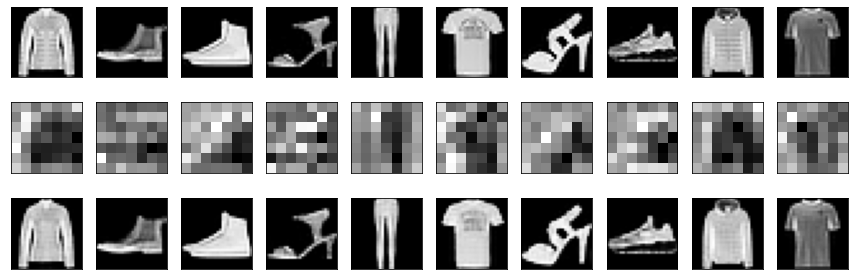

In [ ]:
# take 1 batch of the dataset
test_dataset = test_dataset.take(1)

# take the input images and put them in a list
output_samples = []
for input_image, image in tfds.as_numpy(test_dataset):
      output_samples = input_image

# pick 10 indices
idxs = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# prepare test samples as a batch of 10 images
conv_output_samples = np.array(output_samples[idxs])
conv_output_samples = np.reshape(conv_output_samples, (10, 28, 28, 1))

# get the encoder ouput
encoded = convolutional_encoder_model.predict(conv_output_samples)

# get a prediction for some values in the dataset
predicted = convolutional_model.predict(conv_output_samples)

# display the samples, encodings and decoded values!
display_results(conv_output_samples, encoded, predicted, enc_shape=(7,7))